In [99]:
!pip install pandas duckdb matplotlib seaborn

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [100]:
file_path = '../tpc_xeon.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=",")
else:
    raise FileNotFoundError(f"The file {file_path} does not exist.")

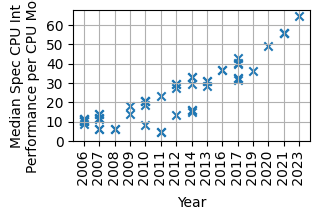

In [105]:
key_year = 'model_launch_year'
key_spec_perf = "median_spec_int_perf"
key_perf_per_tdp = "perf_per_tdp"
key_tdp = "TDP/CPU (W)"

figsize = (3, 2)
x_rotation = 90

df = df[~df[key_spec_perf].isna()]
df[key_perf_per_tdp] = df[key_spec_perf] / df[key_tdp]
# print(df)

x_val = key_year
y_val = key_spec_perf

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x')

plt.xlabel('Year')
plt.ylabel("Median Spec\nInt Performance")

ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.title('')
plt.xticks(rotation=x_rotation)
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout(pad=0)
plt.savefig("../figures/tcp_cpus_perf.pdf")
plt.show()
plt.close()


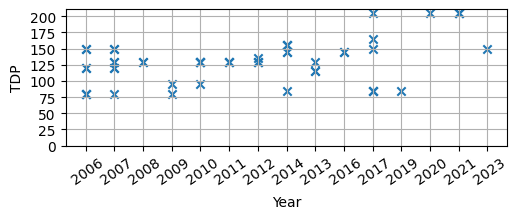

In [102]:
x_val = key_year
y_val = key_tdp

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x')

ax.set_xlabel('Year')
ax.set_ylabel('TDP [Watts]')

ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

ax.set_title('')
plt.xticks(rotation=x_rotation)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.tight_layout(pad=0)
plt.savefig("../figures/tcp_cpus_tdp.pdf")
plt.show()
plt.close()

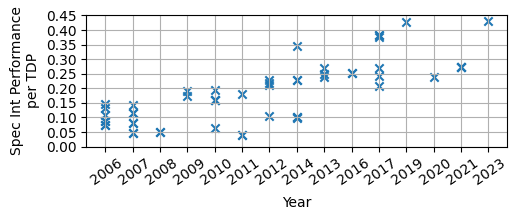

In [103]:
x_val = key_year
y_val = key_perf_per_tdp

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x')

plt.xlabel('Year')
plt.ylabel("Spec Int Performance\nper TDP")

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

ax.set_title('')
plt.xticks(rotation=x_rotation)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.tight_layout(pad=0)
plt.savefig("../figures/tpc_cpus_spec_perf_tdp.pdf")
plt.show()
plt.close()